In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd


# Câu hỏi 4: Tổng quan về hàng hóa toàn cầu của Nga
# trong các năm 2000 - 2015

Chúng ta cùng tìm hiểu lượng của hàng hóa toàn cầu của nước Nga vào những năm 2000 - 2015. Để mà đến khi vào năm 2022, nước Nga ngừng cung cấp lượng hàng hóa này đã khiến lượng hàng hóa giao dịch của các nước Châu Âu kể cả các nước ở châu lục khác bị trì trệ rất nhiều.

Câu hỏi sẽ trả lời được: 
- Top 5 hàng hóa toàn cầu (Tính theo nghìn tấn) mà Nga đang chú tâm vào những năm 2000 - 2015
- 5 hàng hóa hàng đầu của Nga có số lượng và tỉ lệ là bao nhiêu so với các nước khác trong Châu Âu

Từ những câu hỏi này, rút ra kết luận về Nga


### Xử lí số liệu

In [7]:
df = pd.read_csv("Europe.csv")
eu_df = df.drop(['quantity_footnotes'], axis=1)
eu_df.head()
russia_df = eu_df[eu_df['country_or_area'] == 'Russian Federation']
category_name = russia_df['category'].value_counts().index
category_name
russia_category = {}
years = [i for i in range(2000,2015)]
for i in category_name:
    russia_category[i] = russia_df[(russia_df['category'] == i) 
                                                & (russia_df['year'].isin(years)) & (russia_df['unit'] == 'Metric tons,  thousand')]['quantity'].sum()

russia_category = sorted(russia_category.items(),key=lambda x:x[1])
russia_category

[('total_electricity', 0.0),
 ('natural_gas_including_lng', 0.0),
 ('heat', 0.0),
 ('fuelwood', 0.0),
 ('industrial_waste', 0.0),
 ('electricity_net_installed_capacity_of_electric_power_plants', 0.0),
 ('coke_oven_coke', 0.0),
 ('blast_furnace_gas', 0.0),
 ('other_oil_products_n_e_c', 0.0),
 ('uranium', 0.0),
 ('nuclear_electricity', 0.0),
 ('hydro', 0.0),
 ('thermal_electricity', 0.0),
 ('geothermal', 0.0),
 ('wind_electricity', 0.0),
 ('falling_water', 0.0),
 ('solar_electricity', 0.0),
 ('patent_fuel', 6.0),
 ('coal_tar', 44.0),
 ('brown_coal_briquettes', 493.0),
 ('aviation_gasoline', 2630.0),
 ('other_kerosene', 4438.0),
 ('peat_products', 4541.0),
 ('charcoal', 5530.52),
 ('paraffin_waxes', 15502.0),
 ('white_spirit_and_special_boiling_point_industrial_spirits', 36302.0),
 ('peat', 111636.0),
 ('petroleum_coke', 171985.0),
 ('anthracite', 189244.0),
 ('lubricants', 203908.0),
 ('bitumen', 376807.0),
 ('kerosene_type_jet_fuel', 800481.0),
 ('liquified_petroleum_gas', 964922.0),
 (

### Top 5 hàng hóa toàn cầu mà Nga chú tâm

In [8]:
best_category_russia = russia_category[-5:]
country_eu = eu_df['country_or_area'].value_counts().index
best_category_russia

[('total_refinery_output', 6785423.0),
 ('other_bituminous_coal', 9395205.0),
 ('conventional_crude_oil', 324511751.0),
 ('brown_coal', 3579458924.0),
 ('hard_coal', 6473595957.0)]

### Hàng hóa toàn cầu thứ 1: **Lượng dầu lọc được từ nhà máy**

In [13]:
# Best Russia's Category [1] 'total_refinery_output'
category_1_eu = {}
for c in country_eu:
    quantity = eu_df[(eu_df['category'] == best_category_russia[0][0]) & (eu_df['country_or_area'] == c)]['quantity'].sum()
    category_1_eu[c] = quantity

category_1_eu = dict(sorted(category_1_eu.items(),key= lambda x: x[1])[:-9:-1])
category_1_eu

{'Russian Federation': 9839851.0,
 'Germany': 5422924.0,
 'Italy': 4597654.0,
 'United Kingdom': 4224383.0,
 'France': 4061271.0,
 'Netherlands': 3037568.0,
 'Spain': 2918410.0,
 'Belgium': 1809533.0}

### Đồ thị thể hiện số lượng hàng hóa của Nga đối với các nước top đầu trong Châu Âu

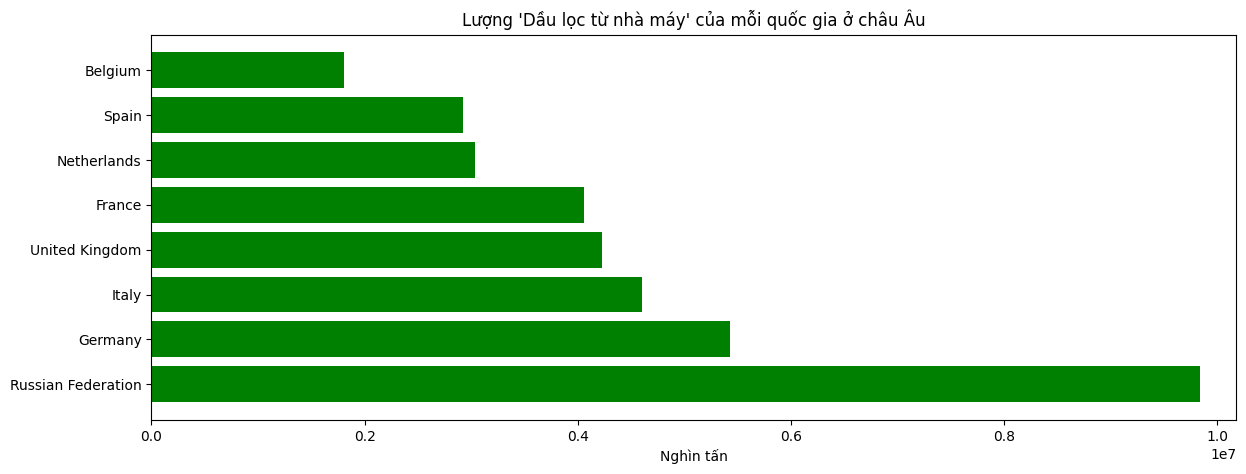

In [24]:
fig, ax=plt.subplots(figsize=(14,5))
ax.barh(list(category_1_eu.keys()),list(category_1_eu.values()),color='green')
ax.set_title("Lượng 'Dầu lọc từ nhà máy' của mỗi quốc gia ở châu Âu")
ax.set_xlabel('Nghìn tấn')
ax.set_xlim([0,best_category_russia[0][1]*1.5])
plt.show()

### Đồ thị thể hiện tỉ lệ phần trăm hàng hóa của Nga đối với các nước top đầu trong Châu Âu

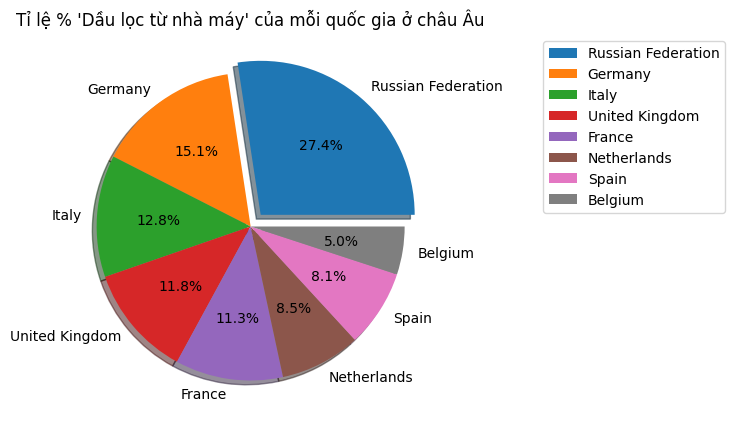

In [23]:
explode = (0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
fig, ax=plt.subplots(figsize=(5,5))
ax.pie(list(category_1_eu.values()),labels = list(category_1_eu.keys()),explode = explode, shadow = True,autopct='%1.1f%%')
ax.set_title("Tỉ lệ % 'Dầu lọc từ nhà máy' của mỗi quốc gia ở châu Âu")
ax.legend(bbox_to_anchor =(1, 0, 0.75, 1))
plt.show()

### Hàng hóa toàn cầu thứ 2,3,4,5: 
- **Than Bitum**
- **Dầu thô thông thường**
- **Than nâu**
- **Than cứng**

In [55]:
# Best Russia's Category [2] [3],[4],[5]: 'other_bituminous_coal','conventional_crude_oil','brown_coal','hard_coal'
list_category = []
category_2_eu = {}
for c in country_eu:
    quantity = eu_df[(eu_df['category'] == best_category_russia[1][0]) & (eu_df['country_or_area'] == c)]['quantity'].sum()
    category_2_eu[c] = quantity

category_2_eu = dict(sorted(category_2_eu.items(),key= lambda x: x[1])[:-9:-1])
list_category.append(category_2_eu)
category_3_eu = {}
for c in country_eu:
    quantity = eu_df[(eu_df['category'] == best_category_russia[2][0]) & (eu_df['country_or_area'] == c)]['quantity'].sum()
    category_3_eu[c] = quantity

category_3_eu = dict(sorted(category_3_eu.items(),key= lambda x: x[1])[:-9:-1])
list_category.append(category_3_eu)

category_4_eu = {}
for c in country_eu:
    quantity = eu_df[(eu_df['category'] == best_category_russia[3][0]) & (eu_df['country_or_area'] == c)]['quantity'].sum()
    category_4_eu[c] = quantity

category_4_eu = dict(sorted(category_3_eu.items(),key= lambda x: x[1])[:-9:-1])
list_category.append(category_4_eu)

category_5_eu = {}
for c in country_eu:
    quantity = eu_df[(eu_df['category'] == best_category_russia[4][0]) & (eu_df['country_or_area'] == c)]['quantity'].sum()
    category_5_eu[c] = quantity

category_5_eu = dict(sorted(category_3_eu.items(),key= lambda x: x[1])[:-9:-1])
list_category.append(category_5_eu)

### Đồ thị thể hiện số lượng hàng hóa và tỉ lệ phần trăm của Nga đối với các nước top đầu trong Châu Âu

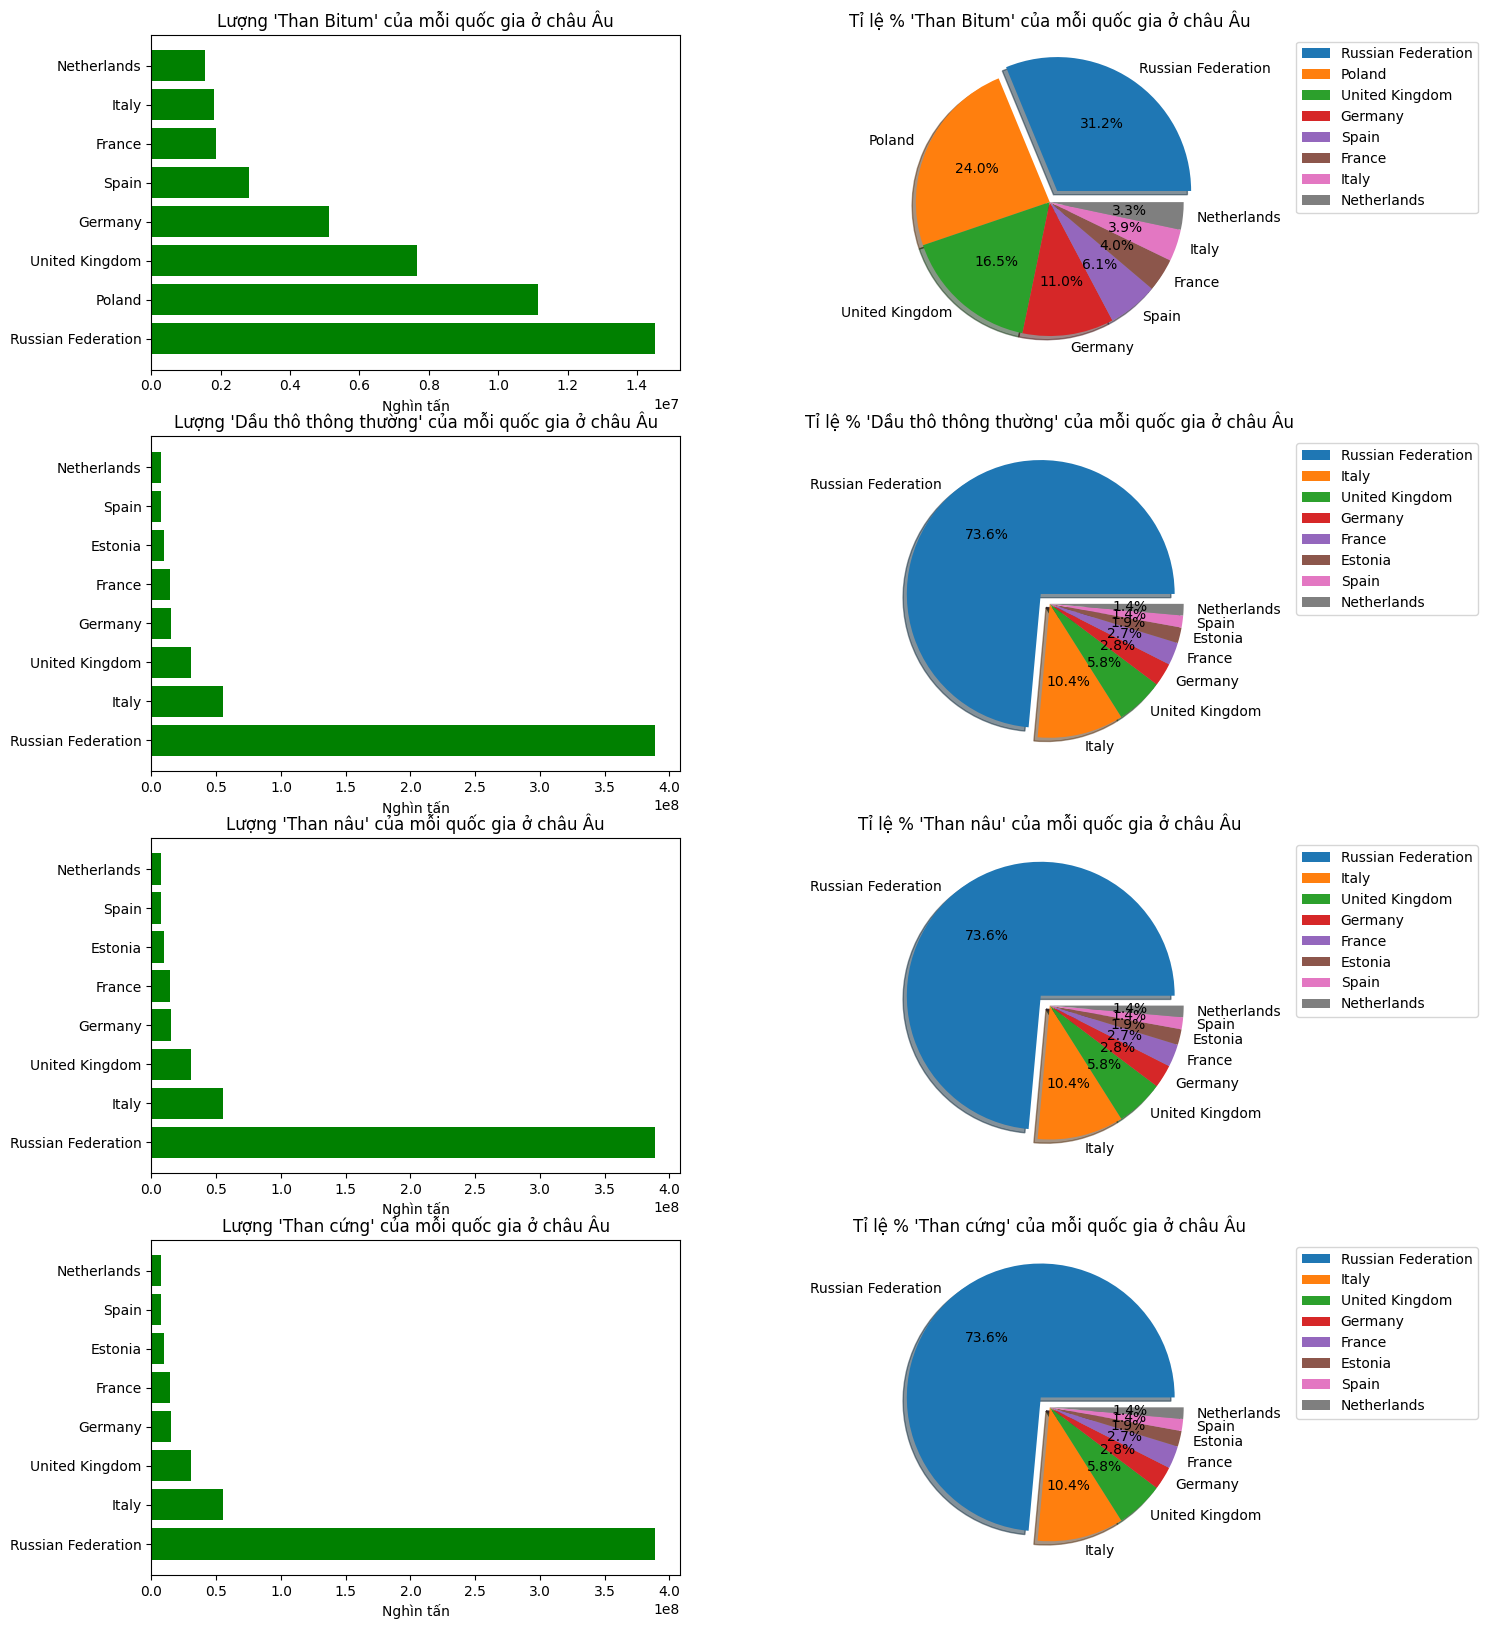

In [65]:
fig, ax= plt.subplots(4,2)
fig.set_figheight(20)
fig.set_figwidth(15)
explode = (0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
category_name = ['Than Bitum','Dầu thô thông thường','Than nâu','Than cứng']
for i in range(4):
    ax[i,0].barh(list(list_category[i].keys()),list(list_category[i].values()),color='green')
    ax[i,0].set_title("Lượng '" + str(category_name[i]) +"' của mỗi quốc gia ở châu Âu")
    ax[i,0].set_xlabel('Nghìn tấn')
    ax[i,1].pie(list(list_category[i].values()),labels = list(list_category[i].keys()),explode = explode, shadow = True,autopct='%1.1f%%')
    ax[i,1].set_title("Tỉ lệ % '" + str(category_name[i]) +"' của mỗi quốc gia ở châu Âu")
    ax[i,1].legend(bbox_to_anchor =(1, 0, 0.8, 1))
plt.show()

### Rút ra kết luận:
<p> Qua biểu đồ về số lượng và tỉ lệ phần trăm của top 5 hàng hóa của Nga, ta dễ dàng nhận thấy các hàng hóa của Nga luôn luôn xếp đầu phản ảnh đúng về việc nước Nga là một đất nước rộng lớn, nhiều tài nguyên cùng với các kĩ thuật tiên tiến ở trong thực tế. Vì vậy ta có thể thấy dữ liệu ở đây cũng khá chính xác ở phần nội dung này
<p> Ngoài ra, thì ta cũng thể thấy được vì sao khi nước Nga thực hiện ngừng ngung cấp hàng hóa ra ngoài khu vực thì sẽ ảnh hưởng rất lớn đến hàng hóa của toàn thế giới, đó chính là vì ở mỗi biểu đồ, hàng hóa của Nga luôn có số lượng và tỉ lệ phần trăm ở top 1. 